<a href="https://colab.research.google.com/github/the-nameshifter/Artificial-Neural-Networks/blob/main/XGBoost_Predicting_customer_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#** Problem Statement**

- We will built a model to predict if the customer will default on their card payments or not, the table is encoded the colums *
- PAY_0 : repayment status in September, 2005 (-1=pay duly, 1=payment delay 1 month,  2=payment delay two months, ...8=payment delay eight months, 9=payment delay nine months)*

- EDUCATION : (1=Graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)*

- MARRIAGE : Marital status(1=married, 2=single, 3=others)*

- SEX : Gender(1=male, 2=female)*


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Credit_card_df = pd.read_csv('/content/UCI_Credit_Card.csv')

In [3]:
Credit_card_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [4]:
Credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
Credit_card_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Visualisating the dataset

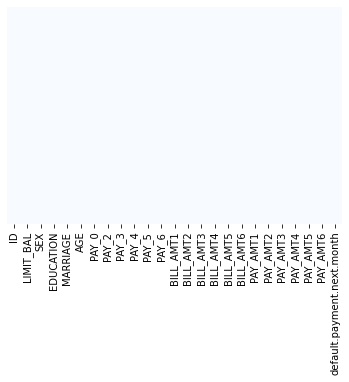

In [6]:
sns.heatmap(Credit_card_df.isnull(), yticklabels = False, cbar = False, cmap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51c86d9fd0>,
      dtype=object)

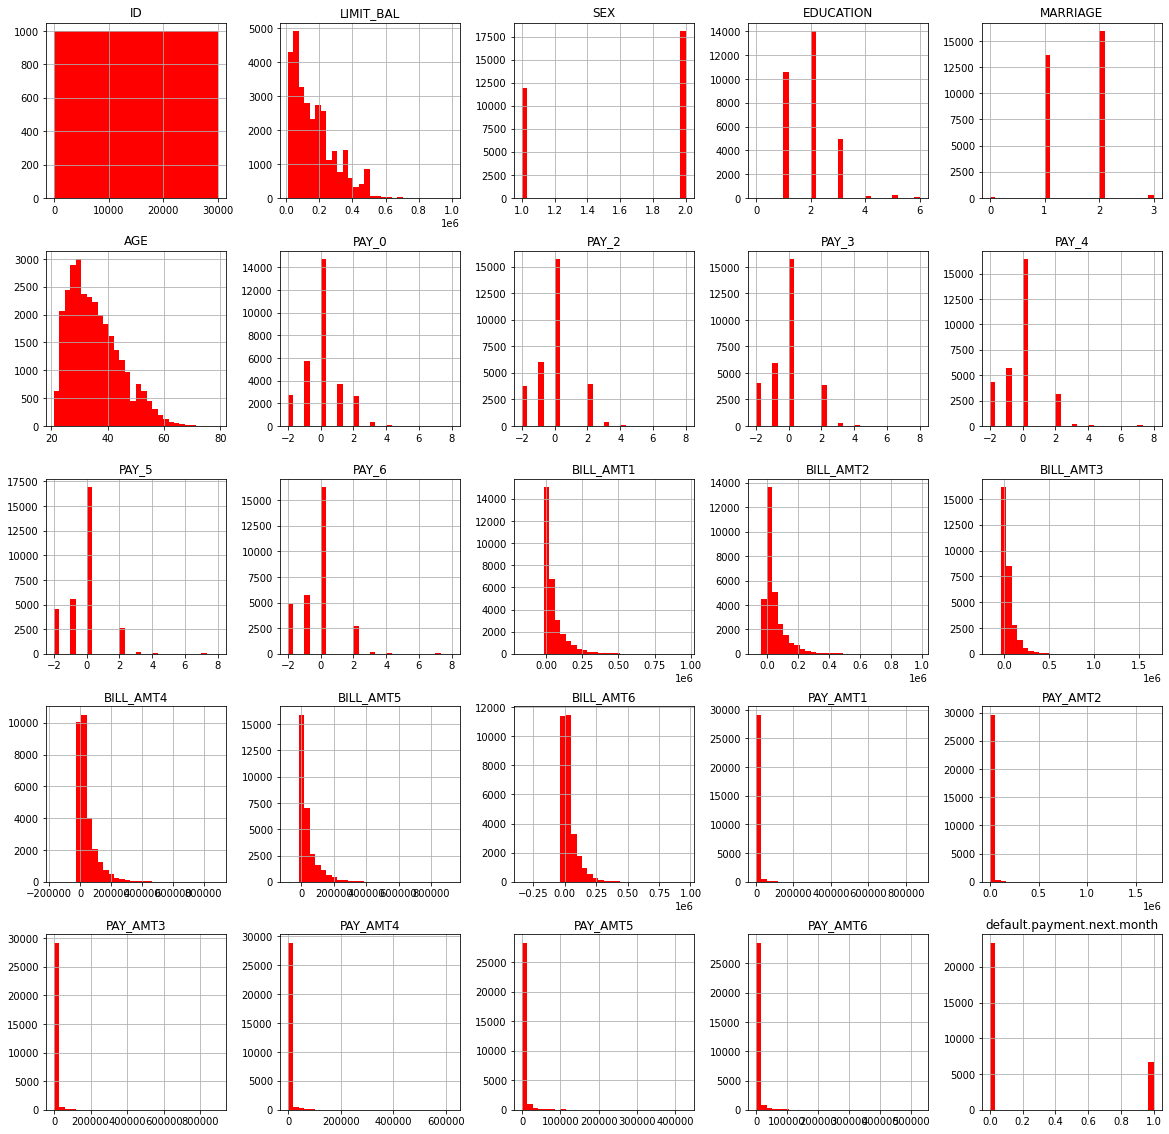

In [7]:
Credit_card_df.hist(bins = 30, figsize= (20, 20), color = 'r')

In [8]:
# Let's drop ID column
Credit_card_df.drop(['ID'], axis=1, inplace= True)

In [9]:
Credit_card_df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [10]:
Credit_card_default_df = Credit_card_df[Credit_card_df['default.payment.next.month'] == 1]
Credit_card_no_default_df = Credit_card_df[Credit_card_df['default.payment.next.month'] == 0]

In [11]:
Credit_card_default_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
13,70000.0,1,2,2,30,1,2,2,0,0,...,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1
16,20000.0,1,1,2,24,0,0,2,2,2,...,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1
21,120000.0,2,2,1,39,-1,-1,-1,-1,-1,...,0.0,632.0,316.0,316.0,316.0,0.0,632.0,316.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,210000.0,1,2,1,34,3,2,2,2,2,...,2500.0,2500.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29994,80000.0,1,2,2,34,2,2,2,2,2,...,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


 It seems that we are dealing with an imbalanced dataset

In [12]:
print("Total =", len(Credit_card_df))
print("Number of customers who defaulted on their credit card payments =", len(Credit_card_default_df))
print("Percentage of customers who defaulted on their cerdit card payments =", 1.*len(Credit_card_default_df)/len(Credit_card_df)*100.0, "%")
print("Number of customers who did not defaulted on their credit card payments (paid their balance) =", len(Credit_card_no_default_df))
print("Percentage of customers who defaulted on their cerdit card payments =", 1.*len(Credit_card_no_default_df)/len(Credit_card_df)*100.0, "%")

Total = 30000
Number of customers who defaulted on their credit card payments = 6636
Percentage of customers who defaulted on their cerdit card payments = 22.12 %
Number of customers who did not defaulted on their credit card payments (paid their balance) = 23364
Percentage of customers who defaulted on their cerdit card payments = 77.88000000000001 %


In [13]:
Credit_card_default_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,...,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.0
mean,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.0
std,115378.540571,0.495520,0.728096,0.525433,9.693438,1.383252,1.502243,1.499401,1.508535,1.482833,...,64351.076092,61424.695949,59579.674268,9544.252427,11737.986064,12959.624486,11191.973162,11944.731175,13464.005894,0.0
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,...,2141.500000,1502.750000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,19119.500000,18478.500000,18028.500000,1636.000000,1533.500000,1222.000000,1000.000000,1000.000000,1000.000000,1.0
75%,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,0.000000,...,50175.750000,47853.000000,47424.000000,3478.250000,3309.750000,3000.000000,2939.250000,3000.000000,2974.500000,1.0
max,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000,1.0


In [14]:
Credit_card_no_default_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,...,23364.000000,23364.000000,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000,23364.0
mean,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,43611.165254,40530.445343,39042.268704,6307.337357,6.640465e+03,5753.496833,5300.529319,5248.220296,5719.371769,0.0
std,131628.359660,0.486806,0.806780,0.520794,9.077355,0.952464,1.035191,1.048378,1.013162,0.977591,...,64324.796730,60617.268112,59547.015717,18014.508990,2.530226e+04,18684.255937,16689.778060,16071.667860,18792.950473,0.0
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,70000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1823.000000,1265.500000,1163.750000,1.005000e+03,600.000000,390.000000,369.000000,300.000000,0.0
50%,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,17998.000000,16679.000000,2459.500000,2.247500e+03,2000.000000,1734.000000,1765.000000,1706.000000,0.0
75%,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55988.000000,51135.250000,49842.500000,5606.250000,5.311250e+03,5000.000000,4602.000000,4600.000000,4545.000000,0.0
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,7.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,0.0


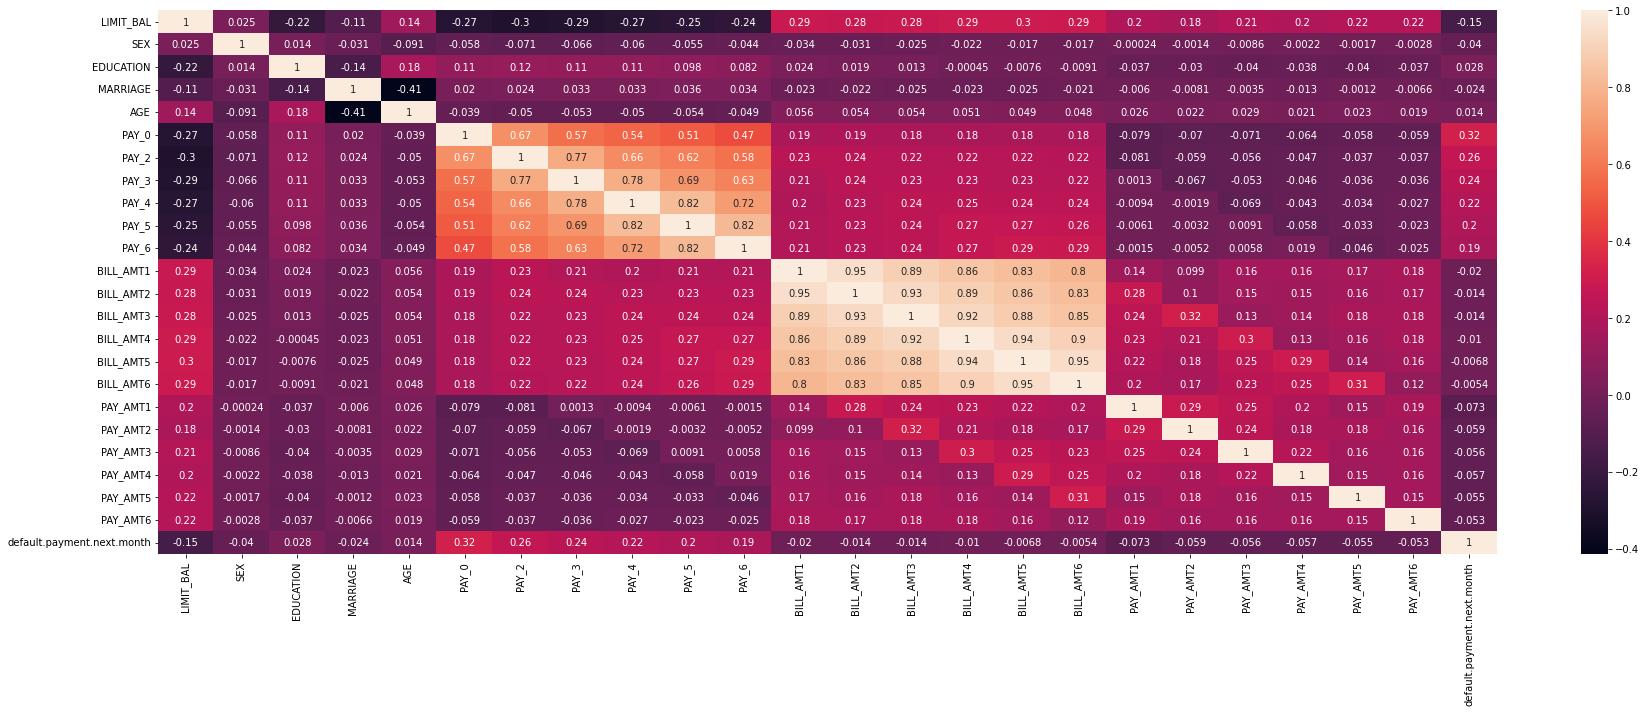

In [15]:
correlations = Credit_card_df.corr()
f, ax = plt.subplots(figsize = (30, 10))
sns.heatmap(correlations, annot = True)

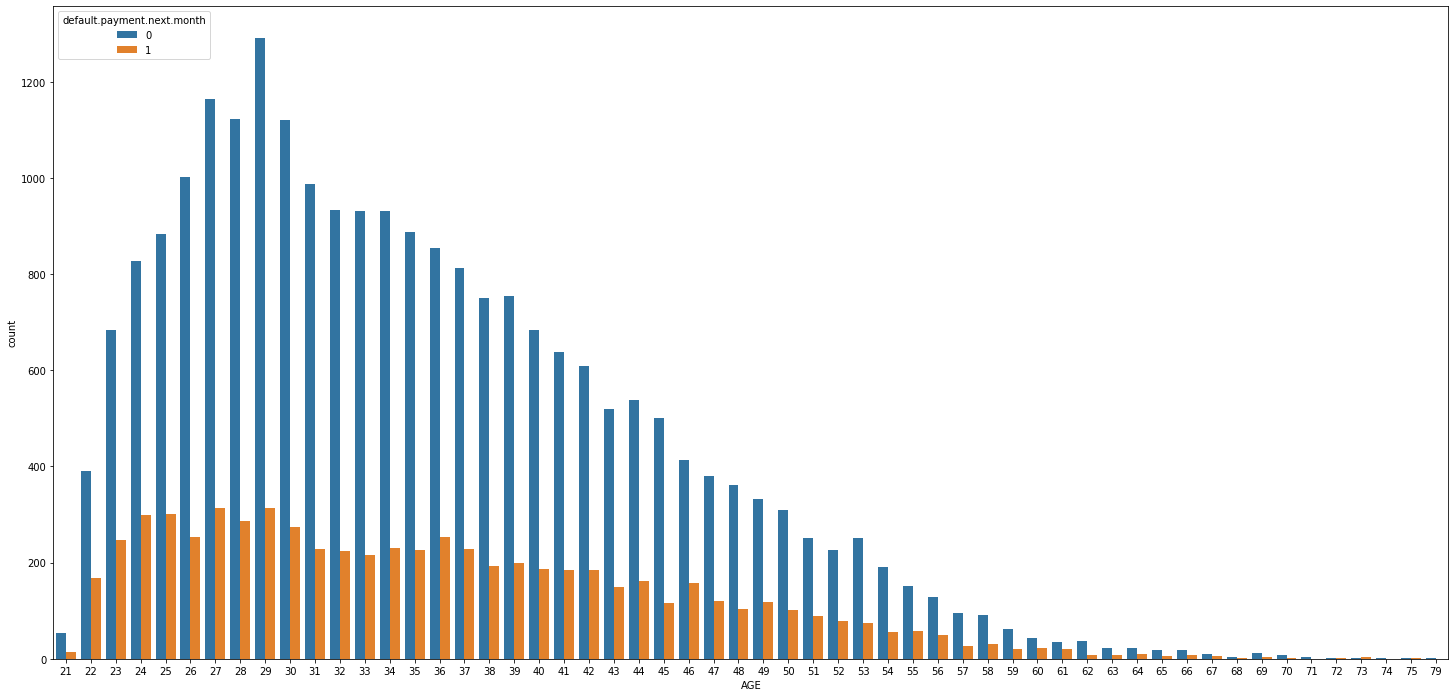

In [16]:
plt.figure(figsize= [25, 12])
sns.countplot(x = 'AGE', hue = 'default.payment.next.month', data = Credit_card_df)

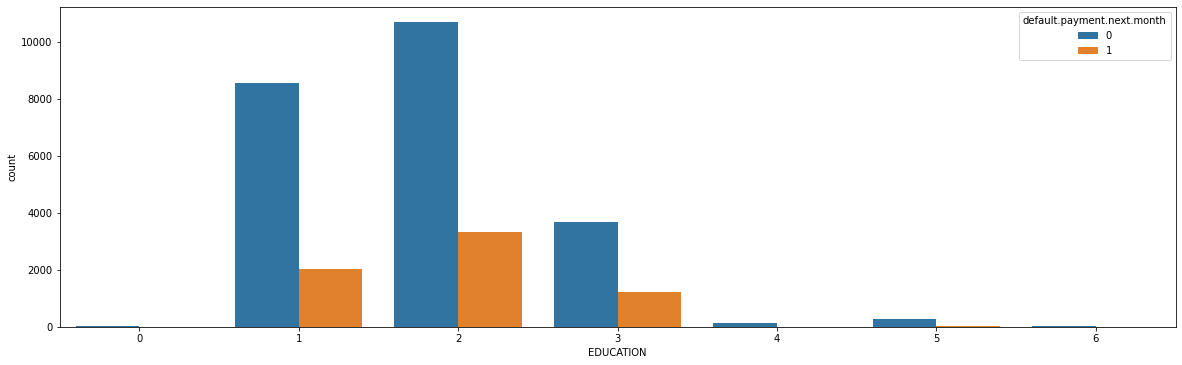

In [17]:
plt.figure(figsize=[20, 20])
plt.subplot(311) # Means 3 rows, 1 column, ..1 fig
sns.countplot(x = 'EDUCATION', hue = 'default.payment.next.month', data = Credit_card_df)

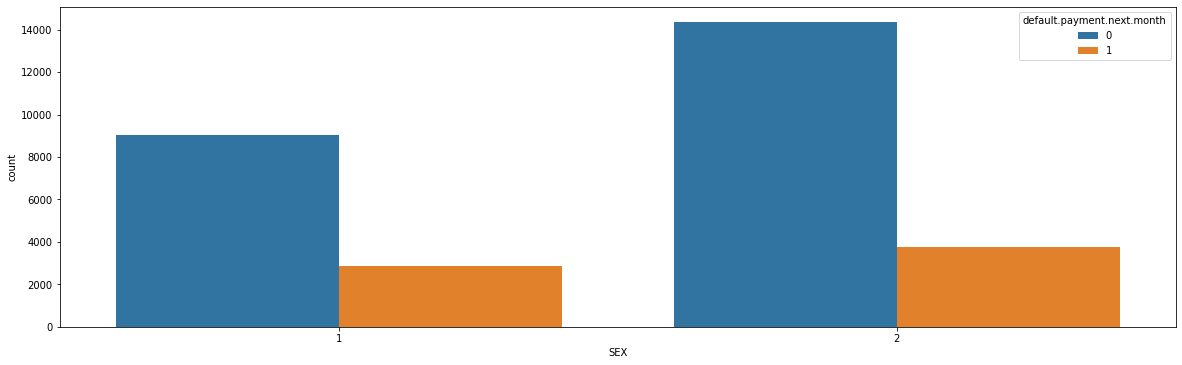

In [18]:
plt.figure(figsize=[20, 20])
plt.subplot(312)
sns.countplot(x = 'SEX', hue = 'default.payment.next.month', data = Credit_card_df)

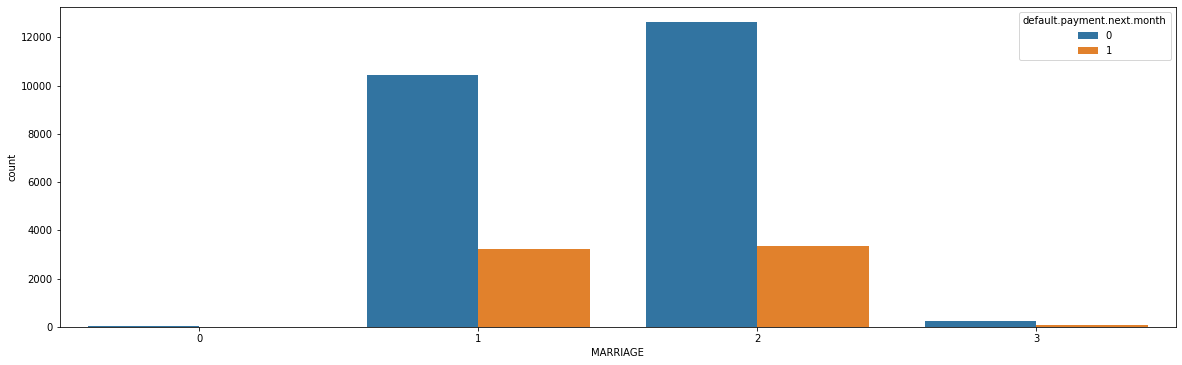

In [19]:
plt.figure(figsize=[20, 20])
plt.subplot(313)
sns.countplot(x = 'MARRIAGE', hue = 'default.payment.next.month', data = Credit_card_df)

### KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable.  
### **KDE describes the probability density at different values in a continuous variable**. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Amount of bill statement in September, 2005 (NT dollar)')

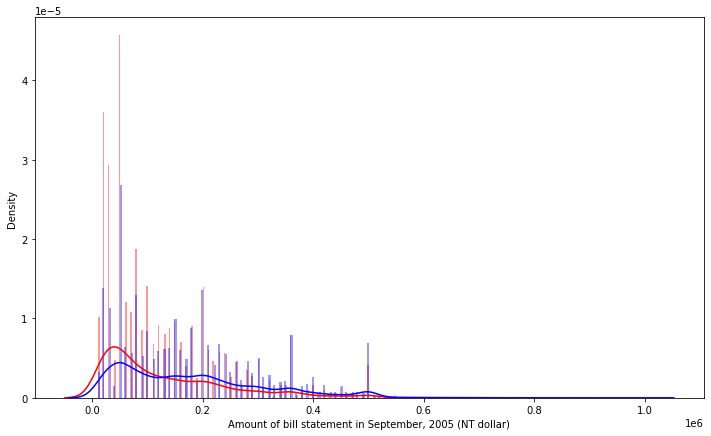

In [20]:
plt.figure(figsize=[12, 7])
sns.distplot(Credit_card_default_df['LIMIT_BAL'], bins = 250, color = 'r')
sns.distplot(Credit_card_no_default_df['LIMIT_BAL'], bins = 250, color = 'b')

plt.xlabel('Amount of bill statement in September, 2005 (NT dollar)')
#plt.xlim(0, 200000)

Text(0.5, 0, 'Amount of bill statement in September, 2005 (NT dollar)')

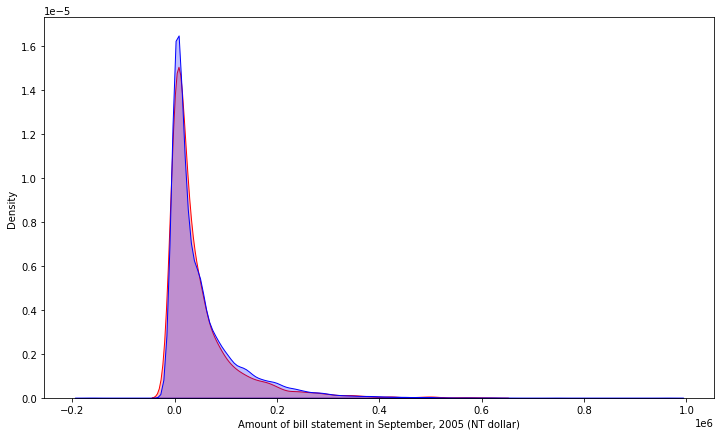

In [21]:
# KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable. 
# KDE describes the probability density at different values in a continuous variable. 
# We do the same for bill
plt.figure(figsize=[12, 7])
sns.kdeplot(Credit_card_default_df['BILL_AMT1'], label = 'Customers who did not default (paid balance)', shade = True, color = 'r')
sns.kdeplot(Credit_card_no_default_df['BILL_AMT1'], label = 'Customers who defaulted (did not pay balance)', shade = True, color = 'b')

plt.xlabel('Amount of bill statement in September, 2005 (NT dollar)')
#plt.xlim(0, 200000)

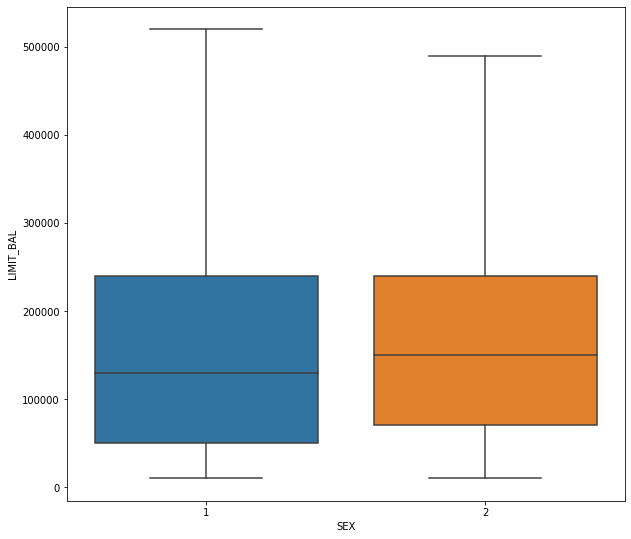

In [22]:
# Let's see  the impact of sex on the limit balance

plt.figure(figsize= [10, 20])
plt.subplot(211)
sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', data = Credit_card_df, showfliers = False)

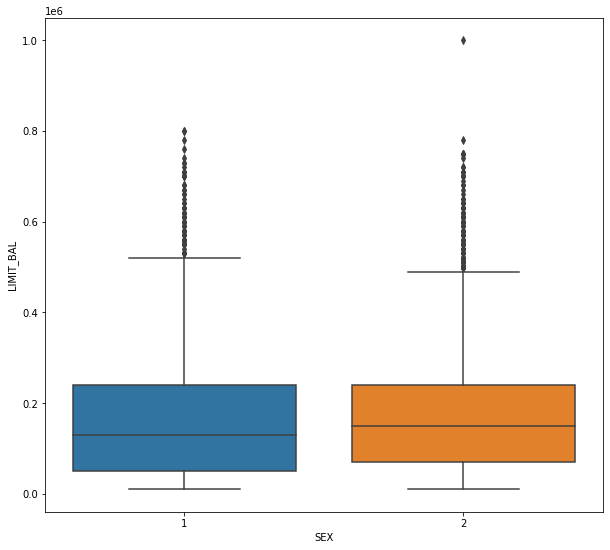

In [23]:
# Let's see  the impact of sex on the limit balance

plt.figure(figsize= [10, 20])
plt.subplot(212)
sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', data = Credit_card_df)

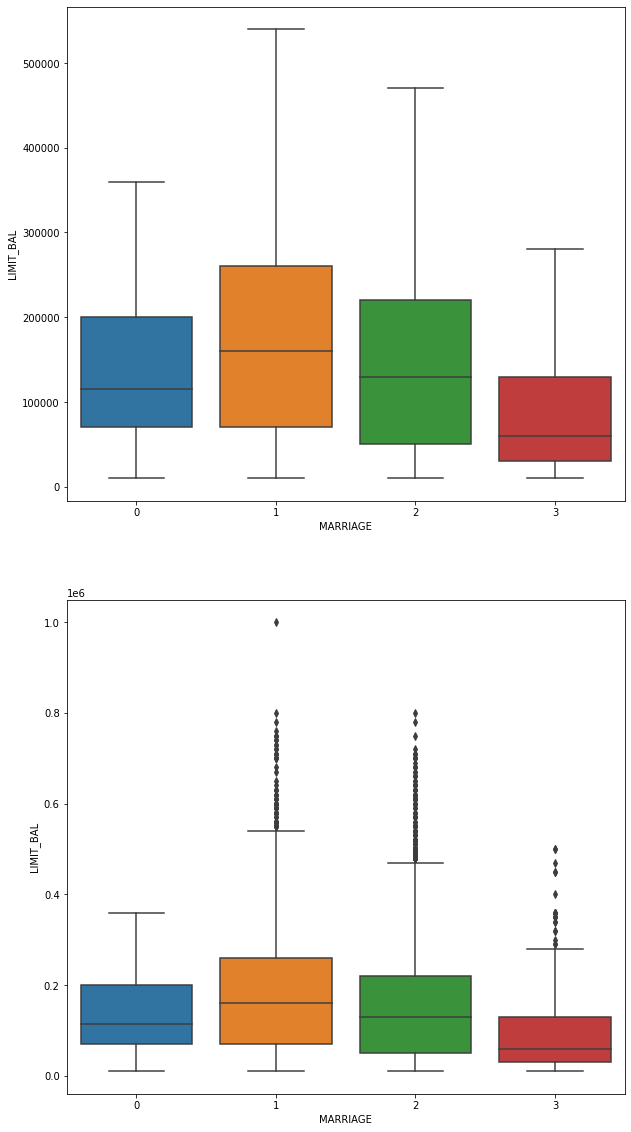

In [24]:
# Let's do the same for Marriage
plt.figure(figsize= [10, 20])
plt.subplot(211)
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = Credit_card_df, showfliers = False)
plt.subplot(212)
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = Credit_card_df)

# Create testing and training dataset and perform datacleaning

In [25]:
Credit_card_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [26]:
# X_cat = categorical variables
X_cat = Credit_card_df[['SEX', 'EDUCATION', 'MARRIAGE']]
X_cat

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1
...,...,...,...
29995,1,3,1
29996,1,3,2
29997,1,2,2
29998,1,3,1


In [27]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [28]:
# we have now 13 columns intead of 3 
X_cat.shape

(30000, 13)

In [29]:
X_cat = pd.DataFrame(X_cat)

In [30]:
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
X_numerical = Credit_card_df.iloc[:,:-1]

In [32]:
X_numerical.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [33]:
# Let's concadenate all
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


## It is not necessary to scale when you use XGBoost algorithm but I do it

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [35]:
y = Credit_card_df.iloc[:, -1]
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

# Train and evaluate an XGBoost Classifier

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [37]:
X_train.shape

(24000, 36)

In [38]:
X_test.shape

(6000, 36)

In [39]:
import xgboost as xgb
model = xgb.XGBClassifier(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 6, n_estimators= 100)
model.fit(X_train, y_train)

XGBClassifier(max_depth=6, objective='reg:squarederror')

In [40]:
y_pred = model.predict(X_test)

In [41]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix

0.8198333333333333


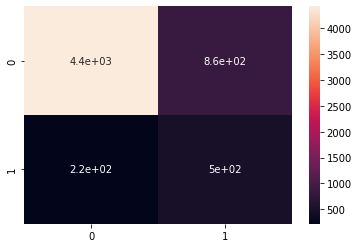

In [43]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_pred, y_test))

# Optimization XGBoost Algoritmn hyperparameters by preforming Grid Search

In [44]:
param_grid = {
    'gamma': [0.5, 1, 5], #Regularization parameter
    'subsample': [0.6, 0.8, 1.0], # % of rows token to builld each tree
    'colsample_bytree': [0.6, 0.8, 1.0], # number of columns used by each tree
    'max_depth' : [3, 4, 5] # depth of each tree
}

In [45]:
param_grid = {
    'gamma': [0.5, 1, 5], #Regularization parameter
    'subsample': [0.6, 0.8, 1.0], # % of rows token to builld each tree
    'colsample_bytree': [0.6, 0.8, 1.0], # number of columns used by each tree
    'max_depth' : [3, 4, 5] # depth of each tree
}
from xgboost import XGBClassifier

xgb_model = XGBClassifier(learning_rate=0.01, n_estimators=100, objective='binary:logistic')
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(xgb_model, param_grid, refit = True, verbose = 4)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.816 total time=   2.2s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.811 total time=   2.2s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.813 total time=   2.2s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.817 total time=   2.2s
[CV 5/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6;, score=0.817 total time=   2.2s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.816 total time=   2.0s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.811 total time=   2.0s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.811 total time=   2.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8;, score=0.816 tot

GridSearchCV(estimator=XGBClassifier(learning_rate=0.01),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 5], 'max_depth': [3, 4, 5],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=4)

In [50]:
y_predict_optim = grid.predict(X_test)

In [51]:
y_predict_optim

array([0, 0, 0, ..., 0, 0, 0])

0.8213333333333334
[[4445  876]
 [ 196  483]]


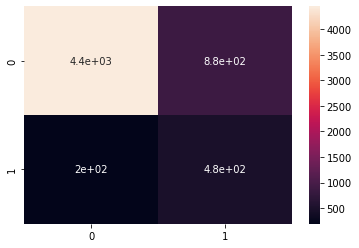

In [52]:
cm = confusion_matrix(y_predict_optim, y_test)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_predict_optim, y_test))
print(cm)